In [347]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import decomposition

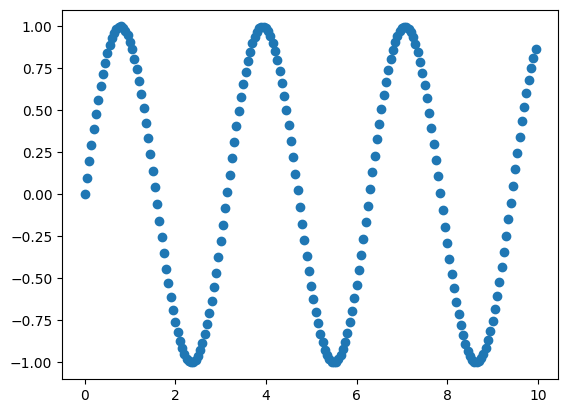

In [348]:
dt = 0.05
max_time = 10

omega = 2

t = np.arange(0, max_time, dt)
x = np.sin(omega*t)

plt.scatter(t, x)


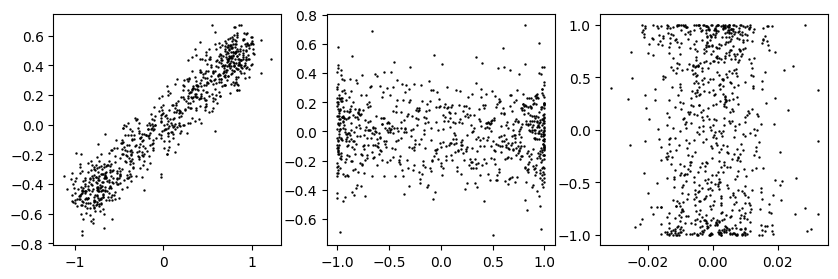

In [349]:
dt = 0.05
max_time = 10

omega = 2

t = np.arange(0, max_time, dt)
x = np.sin(omega*t)

def noisy_project(t, sigma_m, sigma_s, theta, shift_x=0, shift_y=0):
    side_noise = np.random.normal(0, sigma_s, size=len(t)) # add gaussian noise
    move_noise = np.random.normal(0, sigma_m, size=len(t)) # add gaussian noise

    x = np.sin(t) + move_noise
    y = np.zeros_like(x) + side_noise
    ## perform projection

    rot_x = x*np.cos(theta) - y*np.sin(theta)
    rot_y = x*np.sin(theta) + y*np.cos(theta)
    return (rot_x - shift_x, rot_y - shift_y)

dt = 0.05
max_time = 40
omega = 2

t = np.arange(0, max_time, dt)


fig, axs = plt.subplots(1, 3, figsize=(10, 3))
x1, y1 = noisy_project(t, 0.1, 0.1, 0.5, 0, 0)
axs[0].scatter(x1, y1, s=0.5, color='black')
x2, y2 = noisy_project(t, 0, 0.2, 0, 0, 0)
axs[1].scatter(x2, y2, s=0.5, color='black')
x3, y3 = noisy_project(t, 0, 0.01, np.pi/2, 0, 0)
axs[2].scatter(x3, y3, s=0.5, color='black')

(6, 800)


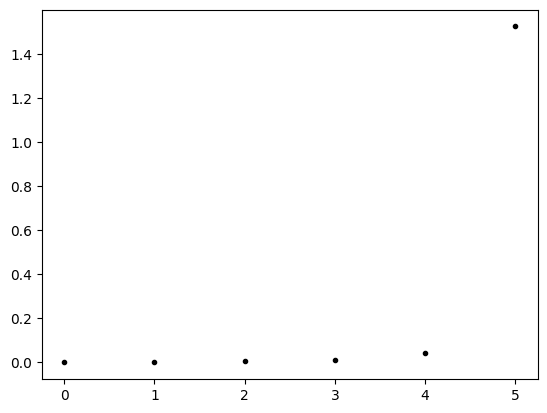

In [350]:
X = np.array([x1, y1, x2, y2, x3, y3])
print(X.shape)

cov_matrix = np.cov(X)
eigval, eigvec = np.linalg.eigh(cov_matrix)

plt.plot(eigval, 'k.')

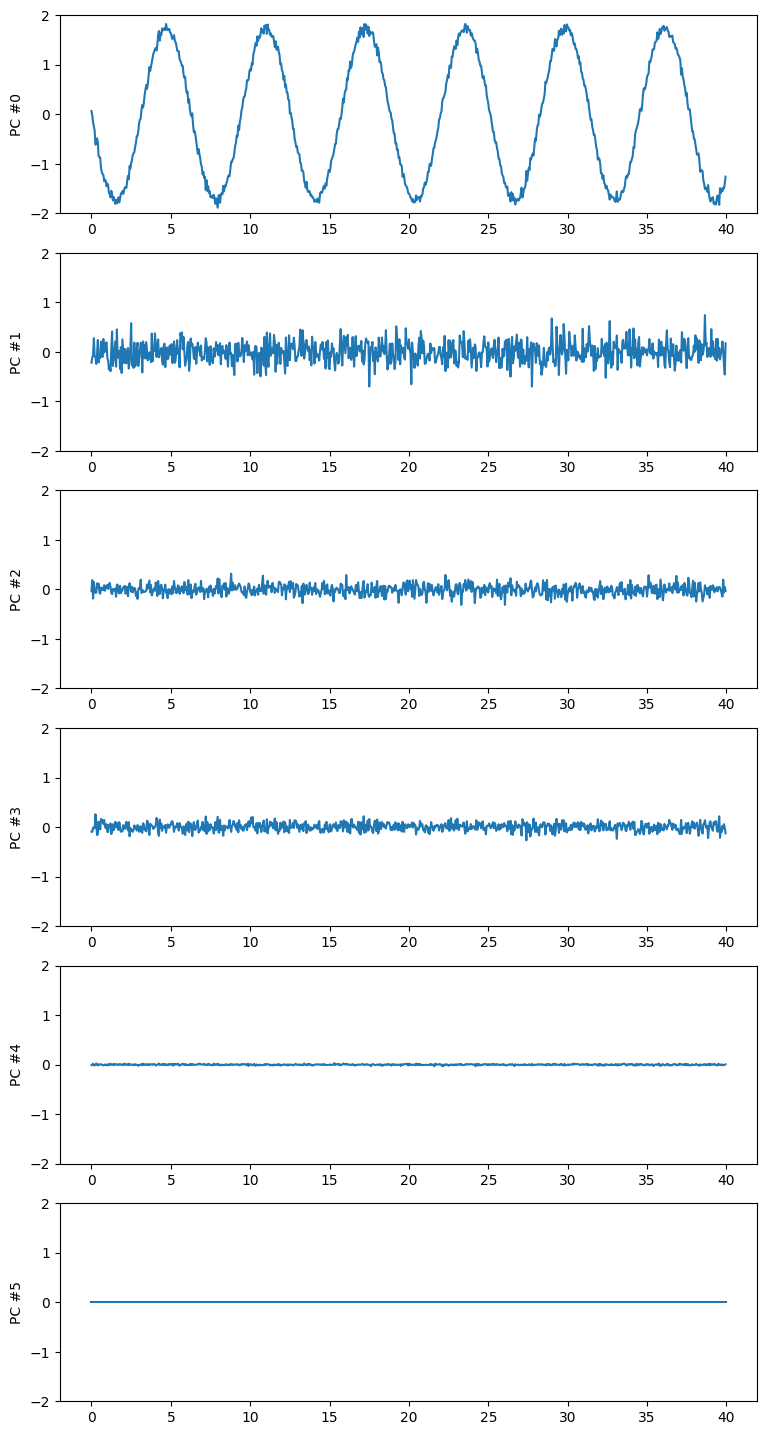

In [351]:
eigval = eigval[::-1]
signals = eigvec.T @ X
signals = signals [::-1]

fig, axs = plt.subplots(6, 1, figsize=(9, 18))

for idx, ax in enumerate(axs):
    ax.plot(t, signals[idx])
    ax.set_ylabel(f'PC #{idx}')
    ax.set_ylim(-2,2)

With 1 PCs :: RSS is 6.923888
With 2 PCs :: RSS is 6.891365
With 3 PCs :: RSS is 1.009978
With 4 PCs :: RSS is 0.000003
With 5 PCs :: RSS is 0.000000
With 6 PCs :: RSS is 0.000000


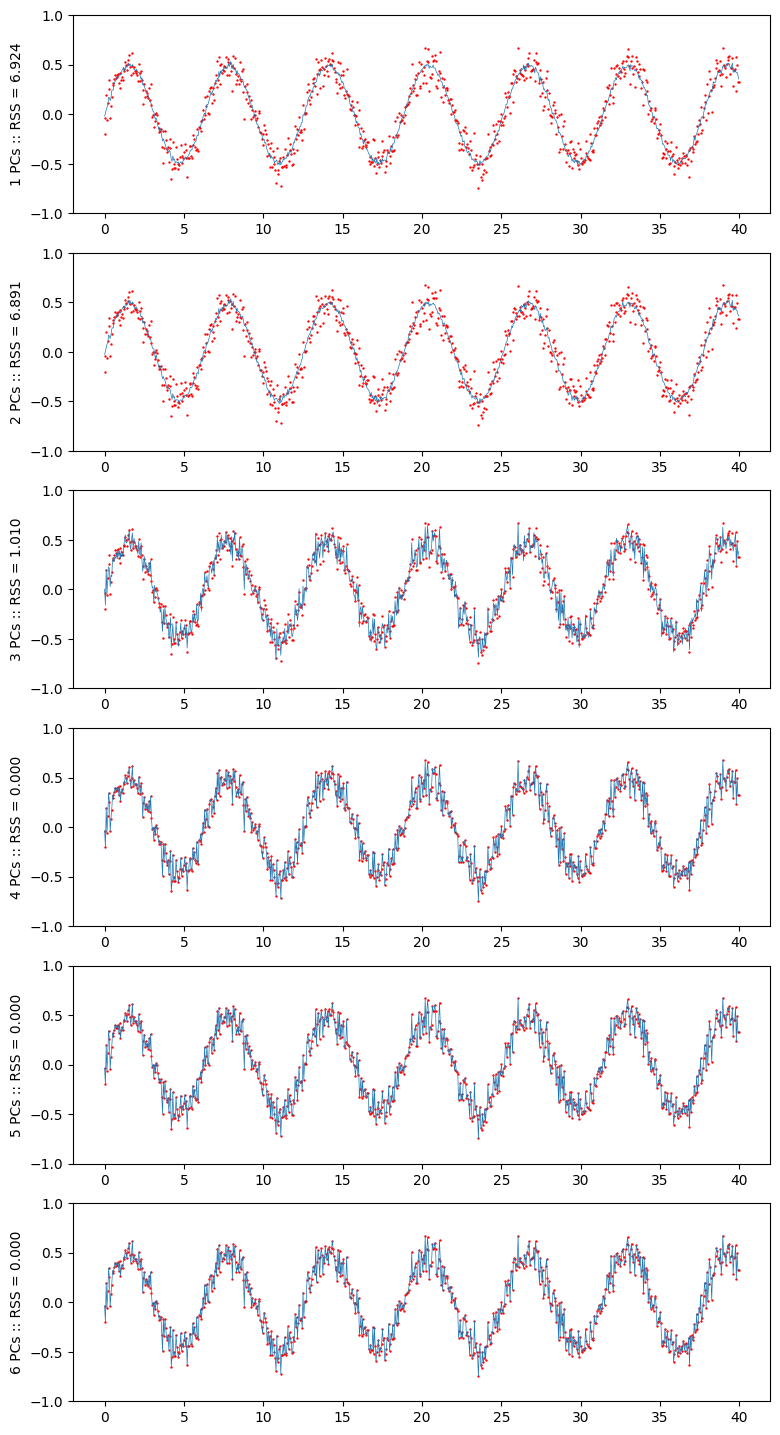

In [352]:
# Pick which signal in X to reconstruct
reconst_idx = 1
# Fetch the weights to apply in the linear combination
reconst_weights = eigvec[reconst_idx, :][::-1]

# Note: len(eigval) is the dimensionality of
# the space i.e. number of basis vectors
fig, axs = plt.subplots(len(eigval), 1, figsize=(9,18))

x = np.zeros_like(t)
# Keep adding basis*weight
for idx, ax in enumerate(axs):
    x = x + signals[idx] * reconst_weights[idx]
    ax.plot(t, x, linewidth=0.5) # N-th reconstruction
    ax.scatter(t, X[reconst_idx], s=0.5, color='red') # original data

    ax.set_ylabel(f"{idx + 1} PCs :: RSS = {np.sum((X[reconst_idx] - x)**2):.3f}")
    ax.set_ylim(-1,1)

    print(f"With {idx + 1} PCs :: RSS is {np.sum((X[reconst_idx] - x)**2):.6f}")

(400, 112, 92)

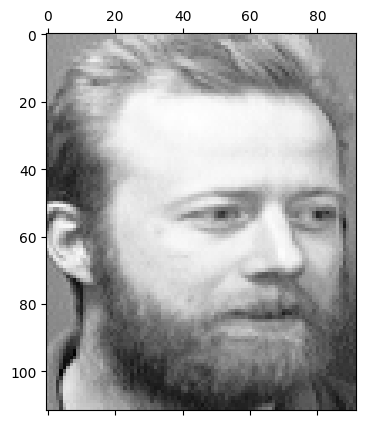

In [353]:
the_faces = np.load('att-faces-400.npz')['dataset']

plt.matshow(the_faces[np.random.choice(len(the_faces[:,:,:])),:,:], cmap='Greys_r')
the_faces.shape

(400, 10304)


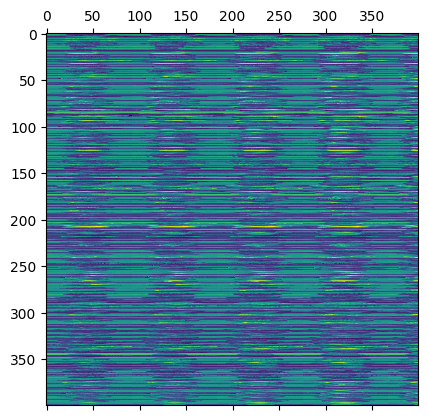

In [354]:
dataset_tab = np.stack([i.flatten() for i in the_faces], axis=0)
plt.matshow(dataset_tab[:,:400])
print(dataset_tab.shape)

In [355]:
PCA = decomposition.PCA().fit(dataset_tab)
transformed = PCA.transform(dataset_tab)

import matplotlib.pyplot as plt
import numpy as np

# Assuming PCA components are stored in PCA.components_
components = PCA.components_ # First 6 components
image_shape = (112, 92)  # Adjust based on your original image shape

In [356]:
components.shape

(400, 10304)

Text(0.5, 1.0, 'Principal Component Weight 0 and 1')

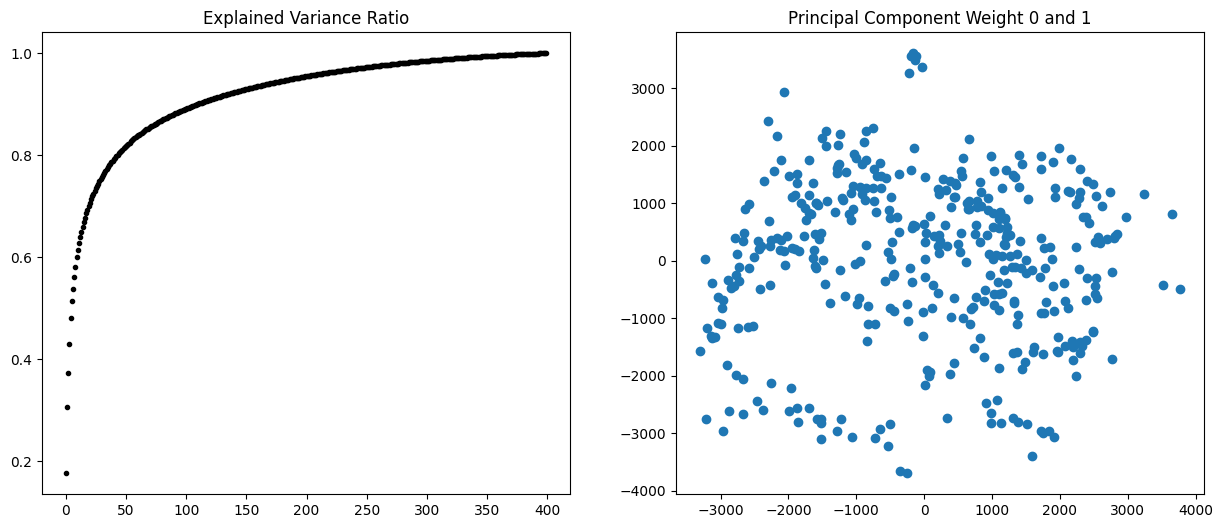

In [363]:
ex_ratio = PCA.explained_variance_ratio_

fig, ax = plt.subplots(1, 2, figsize = (15, 6))
ax[0].plot(np.cumsum(ex_ratio), 'k.')
ax[0].set_title('Explained Variance Ratio')
ax[1].scatter(transformed[:,0], transformed[:,1])
ax[1].set_title('Principal Component Weight 0 and 1')

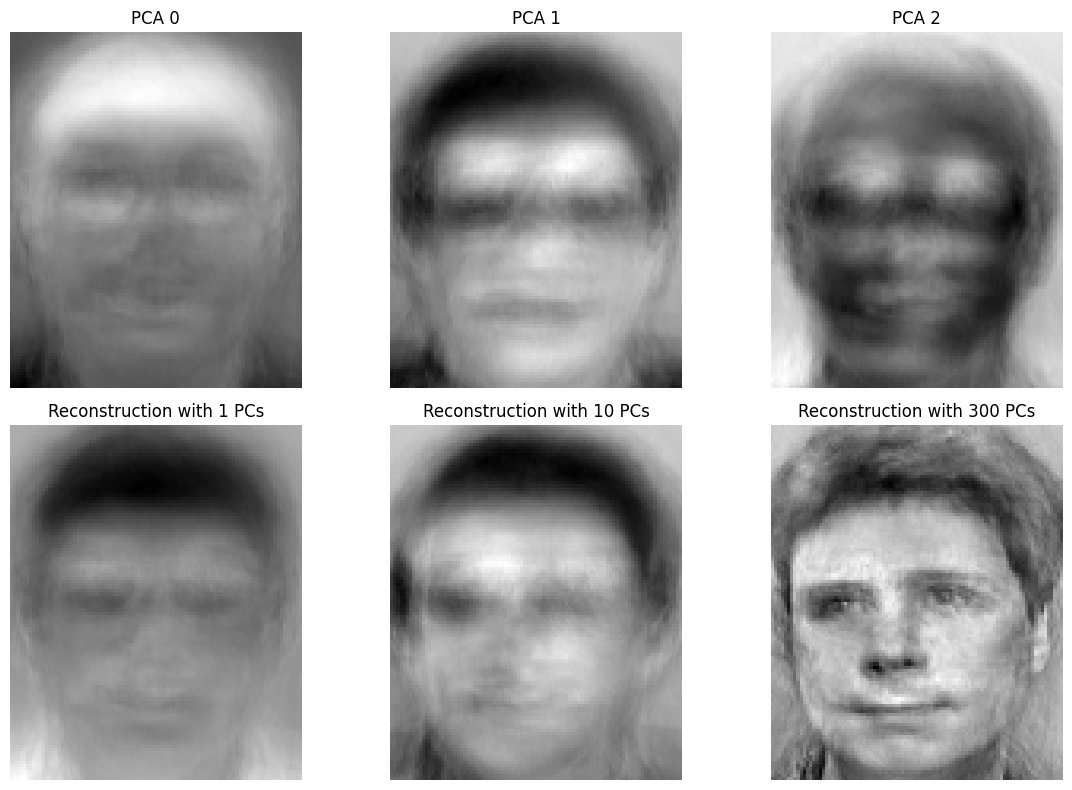

In [361]:
# Pick which signal in X to reconstruct
reconst_idx = 0

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(3):  
    axes[0, i].imshow(components[i].reshape(image_shape), cmap = 'gray')
    axes[0, i].set_title(f'PCA {i}')
    axes[0, i].axis('off')

pcs = [1,10,300]

for i, n_components in enumerate(pcs):
    reconst_img = np.dot(PCA.transform(dataset_tab)[reconst_idx, :n_components], PCA.components_[:n_components])

    axes[1, i].imshow(reconst_img.reshape(image_shape), cmap='gray')
    axes[1, i].set_title(f'Reconstruction with {n_components} PCs')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()
